[View in Colaboratory](https://colab.research.google.com/github/titu1994/Neural-Style-Transfer/blob/master/NeuralStyleTransfer.ipynb)

# Network Type

Choose the network type below : 

- "Network" for the original style transfer
- "INetwork" for the improved style transfer (default)

In [1]:
NETWORK = 'INetwork' + '.py'

In [2]:
# List all the arguments that can be supplied to Network.py
# !python {dir_path}/{NETWORK} -h

# Network Parameters

Here, we will setup all of the parameters for the `Network.py` script.

In [3]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 10
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0


# Content Image

Run the below cell to upload the Content Image. Make sure to select **just 1 image**

In [4]:
import os

CONTENT_IMAGE_FN = 'images/cat.png'
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : images/cat.png


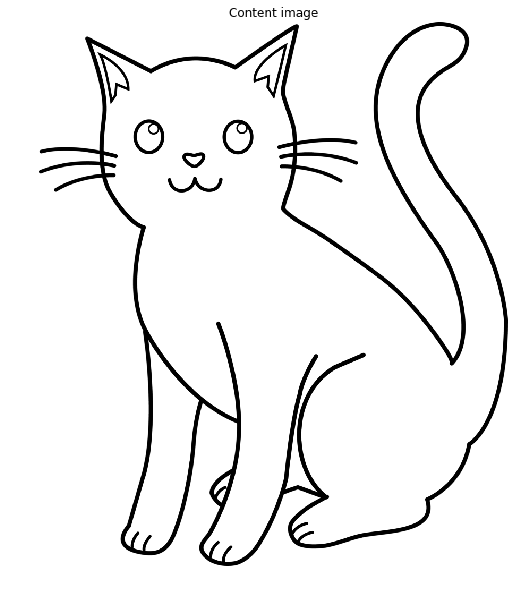

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Style Image

Run the below cell to upload the Style Image. Make sure to select **just 1 image**

In [6]:
STYLE_IMAGE_FN = 'images/celopax.png'
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp
  
print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : images/celopax.png


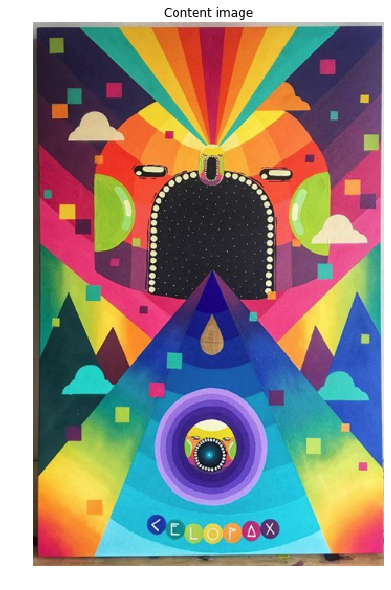

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Generate Image

Run the below cells to generate the image

In [8]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [9]:
!python3.5 {NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.
Model loaded.
Starting iteration 1 of 10
Current loss value: 619732800.0  Improvement : 0.000 %
Rescaling Image to (500, 431)
Image saved as generated/gen_at_iteration_1.png
Iteration 1 completed in 1142s
Starting iteration 2 of 10
Current loss value: 318904580.0  Improvement : 48.542 %
Rescaling Image to (500, 431)
Image saved as generated/gen_at_iteration_2.png
Iteration 2 completed in 1053s
Starting iteration 3 of 10
Current loss value: 217173620.0  Improvement : 31.900 %
Rescaling Image to (500, 431)
Image saved as generated/gen_at_iteration_3.png
Iteration 3 completed in 1081s
Starting iteration 4 of 10
Current loss value: 171868830.0  Improvement : 20.861 %
Rescaling Image to (500, 431)
Image saved as generated/gen_at_iteration_4.png
Iteration 4 completed in 1098s
Starting iteration 5 of 10
Current loss value: 146283490.0  Improvement : 14.887 %
Rescaling Image to (500, 431)
Image saved as generated/gen_at_iteration_5.png
Iteration 5 completed in 1114s
S

sdasdas


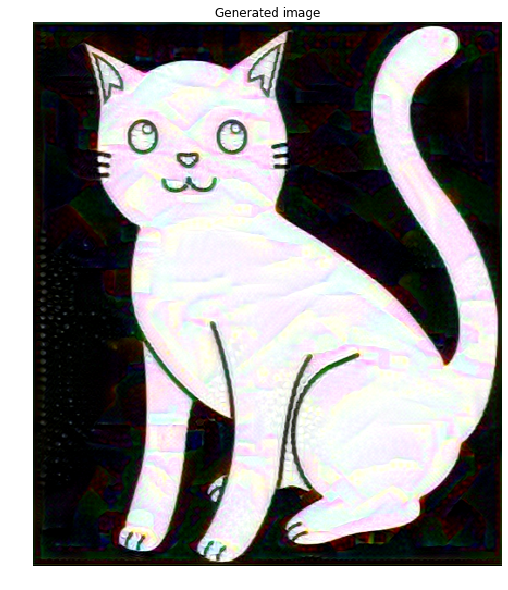

In [10]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)
print('sdasdas')

# (Optional) Color Transfer

If you wish for color transfer between the content image and the generated image, then run the next cell, else skip to "Download Generated Image" section

In [11]:
COLOR_TRANSFER = 'color_transfer.py'
COLOR_FINAL_IMAGE_PATH = FINAL_IMAGE_PATH[:-4] + '_%s_color.png'

# Optional - Use Histogram matching (0 for no, 1 for yes)
HISTOGRAM_MATCH = 0

if HISTOGRAM_MATCH == 0:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('original')
else:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('histogram')
  

!python {dir_path}/{COLOR_TRANSFER} {CONTENT_IMAGE_FN} {FINAL_IMAGE_PATH} --hist_match {HISTOGRAM_MATCH}


/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: can't open file '{dir_path}/{COLOR_TRANSFER}': [Errno 2] No such file or directory


In [12]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(COLOR_FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Color Transferred Generated image')
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'generated/gen_at_iteration_10_original_color.png'

<Figure size 720x720 with 0 Axes>

# Download Color Transfered Image

Run the following cell to download the color transferred result

In [ ]:
# download the color transfered image
files.download(COLOR_FINAL_IMAGE_PATH)

# Download Generated Image

Run the following cell to download the final result

In [ ]:
files.download(FINAL_IMAGE_PATH)